In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pylab import rcParams
%matplotlib inline

REF: https://github.com/avantcontra/coding-druid/blob/master/01-Math-Trig-Function/sine-python/01-math-sine-python.ipynb
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pylab import rcParams

###########################################
# Config CONSTANT 
NUM   = 50  # sample point number along X axis
DEN   = 20  # sample point number along Y axis
INTV  = 200 # animation display interval(ms)
R     = 1   # the unit circle radius 
YLIM  = R*3 # Y axis limit
PI    = np.pi
PD    = 2   # Period, must be INT

x_max = 2*PI*PD # float
X_MAX = int(x_max) + PD*6

# Config Chart
rcParams['figure.figsize'] = X_MAX, 9

LW    = 4   # linewidth for chart plot
lw    = 2   # support line width

TAN_EN  = False # if display tan

# chat plt color config:
SIN_CLR = '#ff0000'
COS_CLR = '#00ff00'
TAN_CLR = '#0000ff'
SUP_CLR = '#dddddd' # grey
BLK_CLR = '#000000' # black
RAD_CLR = '#111111'

# Animation config
FPS = 10


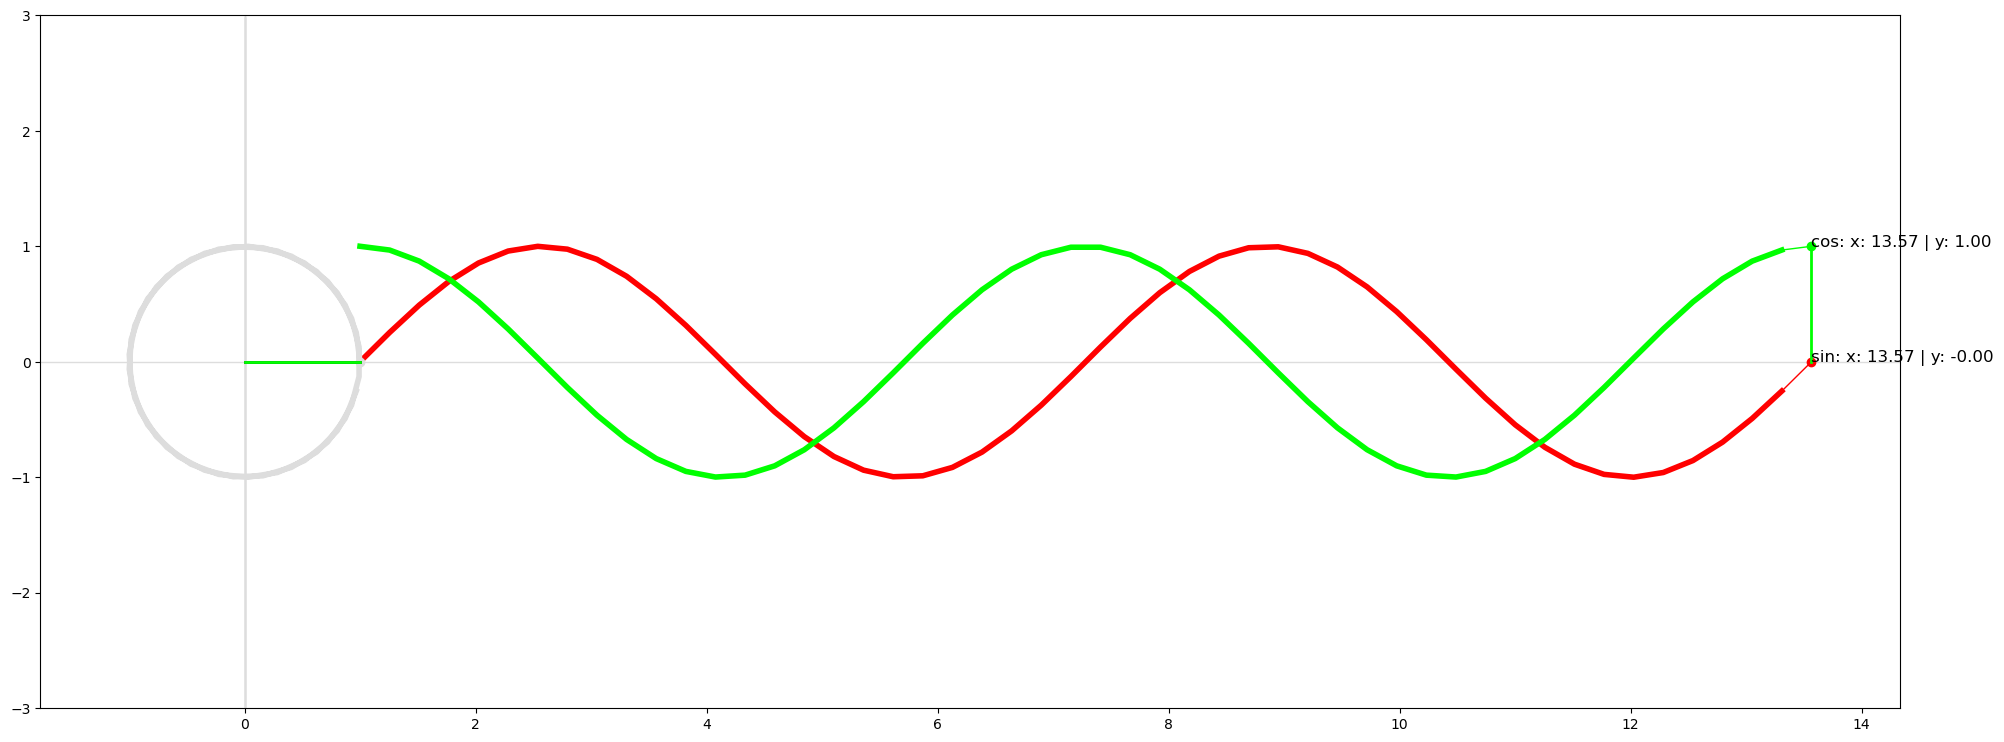

In [6]:
###########################################
# fig init
fig, ax = plt.subplots(1,1)
plt.axis('equal')
#polar = plt.subplot(111, projection='polar') # polar coodinator,not compatible

# text init

STXT = plt.text(0, 0, '', fontsize=12)  # sine annotation
CTXT = plt.text(0, 0, '', fontsize=12)  # cos  annotation


# set x/y limit

ax.set_xlim([0, x_max])
ax.set_ylim([-1*YLIM, 1*YLIM])

# X, Y range
X     = np.linspace(0, x_max, NUM)    # radian
# theta = np.arange(  0, 2*PI, 1/NUM)   # degree, not used

# triangle function
SY = R * np.sin(X)
CY = R * np.cos(X)
TY = R * np.tan(X)

# x axis path
ax.plot(3*X-3, 0*SY,    linewidth=1, color=SUP_CLR)  
# y axis path
ax.plot(0*X,   YLIM*SY, linewidth=1, color=SUP_CLR)

# unit circle path
ax.plot(CY, SY, linewidth=1, color = SUP_CLR)

X_shift = X + R # right shift radius for sin/cosin/tan plot

# sine path
ax.plot(X_shift, SY, linewidth=1, color = SIN_CLR) 

# cosin path
ax.plot(X_shift, CY, linewidth=1, color = COS_CLR)

# tan path 
if TAN_EN:
    ax.plot(X_shift, TY, linewidth=1, color = TAN_CLR) 


def get_anim_obj(ax, line_width, color):
    line_obj, = ax.plot([], [], linewidth=line_width, color=color)
    dot_obj , = ax.plot([], [], 'o', color=color)
    return line_obj, dot_obj


# support line coordinate calc      
## support line in circle
def hline(rad, in_circle = True ):
    rx, ry = [], []
    s = R / NUM
    r = 0
    x_cord = R if in_circle else rad
    for i in range(NUM+1):
        rx.append(x_cord * np.cos(rad) ) 
        ry.append(r * np.sin(rad)) 
        r += s
    return rx, ry    
    
    
def bline(rad, in_circle = True):
    rx, ry = [], []
    s = R / NUM
    r = 0
    x_cord = R if in_circle else rad
    for i in range(NUM+1):
        rx.append(r * np.cos(rad) ) 
        ry.append(x_cord * np.sin(rad)) 
        r += s
    return rx, ry    


def rline(rad):
    rx, _ = bline(rad, in_circle = True)
    _, ry = hline(rad, in_circle = True)
    return rx, ry

## support line out of circle
def line_out_circle(rad, ind, curve = 'sin'):
    rx = np.ones(DEN) * rad
    if curve == 'sin':
        ry = np.linspace(0, SY[ind], DEN)
    else:
        ry = np.linspace(0, CY[ind], DEN)
    
    return rx, ry  
    
    
###########################################

# ------ anim color/width setup-------
sineLine, sineDot = get_anim_obj(ax, LW, SIN_CLR)
cosLine,  cosDot  = get_anim_obj(ax, LW, COS_CLR)
tanLine,  tanDot  = get_anim_obj(ax, LW, TAN_CLR)
circleLine, circleDot = get_anim_obj(ax, LW, SUP_CLR)

## support lines in side circle
rLine, _ = get_anim_obj(ax, lw, RAD_CLR)
hLine, _ = get_anim_obj(ax, lw, SIN_CLR)
bLine, _ = get_anim_obj(ax, lw, COS_CLR)

## support lines for sine and cos
sLine, _ = get_anim_obj(ax, lw, SIN_CLR)
cLine, _ = get_anim_obj(ax, lw, COS_CLR)


def Anim(i):
    
    # sine anim
    sineLine.set_data(X_shift[:i], SY[:i])
    sineDot.set_data (X_shift[i] , SY[i])
    STXT.set_position ((X_shift[i] , SY[i]))
    STXT.set_text ("sin: x: %.2f | y: %.2f" %(X_shift[i] , SY[i]))
    
    # cos anim
    cosLine.set_data (X_shift[:i], CY[:i])
    cosDot.set_data  (X_shift[i] , CY[i])
    CTXT.set_position ((X_shift[i] , CY[i]))
    CTXT.set_text ("cos: x: %.2f | y: %.2f" %(X_shift[i] , CY[i]))
    
    # tan anim
    if TAN_EN:
        tanLine.set_data (X_shift[:i], TY[:i])
        tanDot.set_data  (X_shift[i] , TY[i])    
    
    # circle anim
    circleLine.set_data(CY[:i], SY[:i])
    circleDot.set_data (CY[i],  SY[i])
    
    # support lines anim
    rLine.set_data  (rline(X[i]))
    hLine.set_data  (hline(X[i]))
    bLine.set_data  (bline(X[i]))
    
    sLine.set_data (line_out_circle(X_shift[i], i, curve = 'sin'))
    cLine.set_data (line_out_circle(X_shift[i], i, curve = 'cos'))
    

anim = animation.FuncAnimation(fig=fig, func=Anim, frames=NUM, interval=INTV)

###########################################

# anim.save('triangle-py-effect.mp4', writer='ffmpeg')
anim.save('triangle-py-effect.gif', fps=FPS, writer='pillow')

In [ ]:


# def run_animation(func):
#     anim_running = True

#     def onClick(event):
#         nonlocal anim_running
#         if anim_running:
#             anim.event_source.stop()
#             anim_running = False
#         else:
#             anim.event_source.start()
#             anim_running = True


#     fig.canvas.mpl_connect('button_press_event', onClick)

#     anim = animation.FuncAnimation(fig=fig, func=Anim, frames=NUM, interval=INTV)

# run_animation()

In [3]:
X_MAX

24

In [4]:
int(X_MAX*9/16+1)

14